In [1]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import sedov
from fvhoe.solver import EulerSolver
from fvhoe.visualization import sample_circular_average
import matplotlib.pyplot as plt
import numpy as np
from sedov import sedovana

In [2]:
rho0 = 1
E0 = 1
gamma = 1.4
t = 0.5

In [3]:
# solver parameters
N = 32
p = 3

solver = EulerSolver(
    w0=partial(sedov, dims="xy"),
    conservative_ic=True,
    fv_ic=True,
    x=(0, 1),
    y=(0, 1),
    gamma=gamma,
    bc=BoundaryCondition(x=("reflective", "outflow"), y=("reflective", "outflow")),
    CFL=0.8,
    nx=N,
    ny=N,
    px=p,
    py=p,
    riemann_solver="hllc",
    a_posteriori_slope_limiting=True,
    slope_limiter="minmod",
    NAD=1e-3,
    all_floors=True,
    snapshots_as_fv_averages=False,
    cupy=False,
)
solver.rkorder(t)

100%|██████████| 0.5/0.5 [00:21]                  


t=0.5, x=[0.015625, 0.984375], y=[0.015625, 0.984375], z=0.5
horizontal_axis='x', vertical_axis='y'


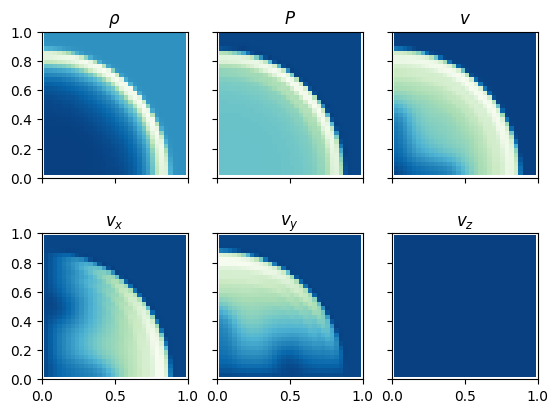

In [4]:
indexing = dict(z=0, t=0.8)

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
ax[0, 0].set_title(r"$\rho$")
solver.plot_2d_slice(ax[0, 0], param="rho", **indexing, verbose=True)
ax[0, 1].set_title(r"$P$")
solver.plot_2d_slice(ax[0, 1], param="P", **indexing, verbose=False)
ax[0, 2].set_title(r"$v$")
solver.plot_2d_slice(ax[0, 2], param="v", **indexing, verbose=False)
ax[1, 0].set_title(r"$v_x$")
solver.plot_2d_slice(ax[1, 0], param="vx", **indexing, verbose=False)
ax[1, 1].set_title(r"$v_y$")
solver.plot_2d_slice(ax[1, 1], param="vy", **indexing, verbose=False)
ax[1, 2].set_title(r"$v_z$")
solver.plot_2d_slice(ax[1, 2], param="vz", **indexing, verbose=False)

for i in range(2):
    for j in range(3):
        ax[i, j].set_xlim(0, 1)
        ax[i, j].set_ylim(0, 1)